#Importing the necessary libraries:

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
import random
import warnings
import os
warnings.filterwarnings("ignore")

# Setting up and authenticating the Kaggle API on system:

In [225]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Moving the kaggle .json file to correct directory:

In [226]:
import shutil

# Move the kaggle.json file to the correct directory
shutil.move('/content/kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the file
!chmod 600 /root/.kaggle/kaggle.json

In [227]:
!kaggle datasets list #Prints the list of datasets on kaggle

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset        Customer Shopping (Latest Trends) Dataset    76KB  2024-11-23 15:26:12          10510        208  1.0              
zafarali27/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                  28KB  2024-11-23 07:53:10           2586         50  1.0              
hopesb/student-depression-dataset                          Student Depression Dataset.                 454KB  2024-11-22 17:56:03           6977         95  0.9411765        
mujtabamatin/air-quality-and-pollution-assessment          Air Quality and Pollution Assessment         84KB  2024-12-04 15:2

#Downloading the required dataset from kaggle:

In [228]:
# Download the dataset
!kaggle datasets download -d yasserhessein/gender-dataset

# Unzip the dataset
!unzip gender-dataset.zip -d gender_dataset

Streaming output truncated to the last 5000 lines.
  inflating: gender_dataset/Dataset/Validation/Male/189674.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189675.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189676.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189679.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189681.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189684.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189688.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189689.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189691.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189692.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189693.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189694.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189695.jpg  
  inflating: gender_dataset/Dataset/Validation/Male/189696.jpg  
  inflating: gender_dataset/Dataset/Val

#Segregating and managing the files:

In [229]:
"""
Test_final_original in contents folder will contain the original images along with rectangles drawn on the faces.

Folders:
Train: Contains the original images downloaded from kaggle. Has "Male" and "Female" subfolders.
Test: Contains the original images downloaded from kaggle. Has "Male" and "Female" subfolders.
Validation: Contains the original images downloaded from kaggle. Has "Male" and "Female" subfolders.
TrainFinal: Contains 3000 original images of both the gender which are taken from Train Folder. (For training)
TestFinal: Contains 300 original images of both the gender which are taken from Test Folder. (For Testing)
ValidateFinal: Contains 300 original images of both the gender which are taken from Validation Folder. (For Validation)
"""

# Creating path for the folders

dataset_dir="gender_dataset"
original_folder_trainm = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Train/Male')
original_folder_trainf = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Train/Female')
original_folder_testm = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Test/Male')
original_folder_testf = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Test/Female')
original_folder_validatem = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Validation/Male')
original_folder_validatef = os.path.join(dataset_dir, '/content/gender_dataset/Dataset/Validation/Female')


# Storing the list of file names in each folder into different variables.

all_files_tm=os.listdir(original_folder_trainm)
all_files_tf=os.listdir(original_folder_trainf)
all_files_tem=os.listdir(original_folder_testm)
all_files_tef=os.listdir(original_folder_testf)
all_files_vm=os.listdir(original_folder_validatem)
all_files_vf=os.listdir(original_folder_validatef)


# Selecting images from Train, Test and Validation folders to be tranferred to TrainFinal, TestFinal and ValidateFinal folders

train_finalm=all_files_tm[1500:3000]
train_finalf=all_files_tf[1500:3000]
test_finalm=all_files_tem[200:350]
test_finalf=all_files_tef[200:350]
validate_finalm=all_files_vm[200:350]
validate_finalf=all_files_vf[200:350]


# Creating TrainFinal, TestFinal and ValidateFinal folders

os.makedirs("/content/gender_dataset/Dataset/TrainFinal",exist_ok=True)
os.makedirs("/content/gender_dataset/Dataset/TestFinal",exist_ok=True)
os.makedirs("/content/gender_dataset/Dataset/ValidateFinal",exist_ok=True)

# Moving the files from Train, Test and Validation folders to TrainFinal, TestFinal and ValidateFinal folders respectively

for file in train_finalm:
  shutil.move(os.path.join(original_folder_trainm, file), os.path.join("/content/gender_dataset/Dataset/TrainFinal", file.replace(".","M.")))
for file in train_finalf:
  shutil.move(os.path.join(original_folder_trainf, file), os.path.join("/content/gender_dataset/Dataset/TrainFinal", file.replace(".","F.")))
for file in test_finalm:
  shutil.move(os.path.join(original_folder_testm, file), os.path.join("/content/gender_dataset/Dataset/TestFinal", file.replace(".","M.")))
for file in test_finalf:
  shutil.move(os.path.join(original_folder_testf, file), os.path.join("/content/gender_dataset/Dataset/TestFinal", file.replace(".","F.")))
for file in validate_finalm:
  shutil.move(os.path.join(original_folder_validatem, file), os.path.join("/content/gender_dataset/Dataset/ValidateFinal", file.replace(".","M.")))
for file in validate_finalf:
  shutil.move(os.path.join(original_folder_validatef, file), os.path.join("/content/gender_dataset/Dataset/ValidateFinal", file.replace(".","F.")))

In [230]:
print("Number of images in TrainFinal folder: ",len(os.listdir("/content/gender_dataset/Dataset/TrainFinal")))
print("Number of images in TestFinal folder: ",len(os.listdir("/content/gender_dataset/Dataset/TestFinal")))
print("Number of images in ValidateFinal folder: ",len(os.listdir("/content/gender_dataset/Dataset/ValidateFinal")))

Number of images in TrainFinal folder:  3000
Number of images in TestFinal folder:  300
Number of images in ValidateFinal folder:  300


# Cropping the images and saving them:

In [231]:
os.makedirs("/content/gender_dataset/Dataset/Test_final_original",exist_ok=True) # Test_final_original will store the original copy of the images with rectangles drawn on the faces


# Loading the pre-trained Haar Cascade classifier for face detection

from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# In each for loop, the image is read, face is detected using pre_trained HaarCascade, cropped and stored.

for i in os.listdir("/content/gender_dataset/Dataset/TrainFinal"):
  i=os.path.join("/content/gender_dataset/Dataset/TrainFinal",i)        # Filepath for storing the cropped images to be used for training
  img=cv2.imread(i)
  if img is None:
    print("Error: Image not found or unable to load.")
  else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cropped=img[y:y+h,x:x+w]
      cv2.imwrite(i,cropped)

for i in os.listdir("/content/gender_dataset/Dataset/ValidateFinal"):
  i=os.path.join("/content/gender_dataset/Dataset/ValidateFinal",i)      # Filepath for storing the cropped images to be used for validation
  img=cv2.imread(i)
  if img is None:
    print("Error: Image not found or unable to load.")
  else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cropped=img[y:y+h,x:x+w]
      cv2.imwrite(i,cropped)

test=np.array([])
for i in os.listdir("/content/gender_dataset/Dataset/TestFinal"):
  temp = i                                                                # Name of test image file
  i=os.path.join("/content/gender_dataset/Dataset/TestFinal",i)           # Filepath for storing the cropped images to be used for testing
  img=cv2.imread(i)
  if img is None:
    print("Error: Image not found or unable to load.")
  else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cropped=img[y:y+h,x:x+w]
      cv2.imwrite(i,cropped)

# Seperating 20 image files for random check

In [232]:
"""
RandomChecking Folder contains the cropped 20 input images for testing.
Test_final_original contains the original 20 input images with rectangle on faces for testing.
"""

os.makedirs("/content/gender_dataset/Dataset/RandomChecking",exist_ok=True)     #Making RandomChecking folder


# Transferring files

random_checkm=all_files_tem[:10]
random_checkf=all_files_tef[:10]
random_check=random_checkm+random_checkf
for i in random_checkm:
  shutil.move(os.path.join("/content/gender_dataset/Dataset/Test/Male",i),os.path.join("/content/gender_dataset/Dataset/RandomChecking",i.replace(".","M.")))
for i in random_checkf:
  shutil.move(os.path.join("/content/gender_dataset/Dataset/Test/Female",i),os.path.join("/content/gender_dataset/Dataset/RandomChecking",i.replace(".","F.")))


# Preprocessing all the 20 images and saving them

for i in os.listdir("/content/gender_dataset/Dataset/RandomChecking"):
  img=cv2.imread(os.path.join("/content/gender_dataset/Dataset/RandomChecking",i))
  if img is None:
    print("Error: Image not found or unable to load.")
  else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cropped=img[y:y+h,x:x+w]
      cv2.imwrite(os.path.join("/content/gender_dataset/Dataset/RandomChecking",i),cropped)
      cv2.imwrite(os.path.join("/content/gender_dataset/Dataset/Test_final_original",i),img)


#Creating Neural Network

In [233]:
model=keras.models.Sequential()
model.add(layers.Conv2D(64,(2,2),activation="relu",input_shape=(64,64,3)))
model.add(layers.MaxPool2D((2,2),padding="same"))
model.add(layers.Conv2D(64,(2,2),activation="relu"))
model.add(layers.MaxPool2D((2,2),padding="same"))
model.add(layers.Conv2D(64,(2,2),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(2,activation="sigmoid"))

#Compilation, Preprocessing and Training

In [234]:
#Compiling the model

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["binary_accuracy"])

#Importing the necessary libraries

import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical


# Initializing lists for data and labels

x_train, y_train = [], []
x_validate, y_validate = [], []
x_test, y_test = [], []


# Defining target image size

img_size = (64, 64)


# Loading training data

for i in os.listdir("/content/gender_dataset/Dataset/TrainFinal"):
    img_path = os.path.join("/content/gender_dataset/Dataset/TrainFinal", i)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Unable to load image {img_path}")
        continue
    if len(img.shape) == 3:  # Grayscale image
        resized_img = cv2.resize(img, img_size)  # Resize to 64x64
        x_train.append(resized_img)
        y_train.append(i[-5])  # Extract label (adjust as needed)


# Loading validation data

for i in os.listdir("/content/gender_dataset/Dataset/ValidateFinal"):
    img_path = os.path.join("/content/gender_dataset/Dataset/ValidateFinal", i)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Unable to load image {img_path}")
        continue
    if len(img.shape) == 3:  # Grayscale image
        resized_img = cv2.resize(img, img_size)
        x_validate.append(resized_img)
        y_validate.append(i[-5])


# Loading test data

x_test_array = []
for i in os.listdir("/content/gender_dataset/Dataset/TestFinal"):
    img_path = os.path.join("/content/gender_dataset/Dataset/TestFinal", i)
    img = cv2.imread(img_path)
    img_original_path=os.path.join("/content/gender_dataset/Dataset/Test_final_original", i)
    img_original=cv2.imread(img_original_path)
    if img is None:
        print(f"Warning: Unable to load image {img_path}")
        continue
    if len(img.shape)==3:
        resized_img = cv2.resize(img, (64,64))
        x_test.append(resized_img)
        y_test.append(i[-5])


# Converting lists to NumPy arrays and normalizing them

x_train = np.array(x_train, dtype="float64") / 255.0
x_validate = np.array(x_validate, dtype="float64") / 255.0
x_test = np.array(x_test, dtype="float64") / 255.0

y_train = np.array(y_train)
y_validate = np.array(y_validate)
y_test = np.array(y_test)


# Encoding the images

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_validate_enc = label_encoder.fit_transform(y_validate)
y_test_enc = label_encoder.fit_transform(y_test)


# One-hot encoding the images

y_train_hot_encoded = to_categorical(y_train_enc, num_classes=2)
y_validate_hot_encoded = to_categorical(y_validate_enc, num_classes=2)
y_test_hot_encoded = to_categorical(y_test_enc, num_classes=2)

# Training the model
history = model.fit(x_train,y_train_hot_encoded,batch_size=60,validation_data=(x_validate, y_validate_hot_encoded),epochs=30,verbose='auto')

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 469ms/step - binary_accuracy: 0.5633 - loss: 0.6776 - val_binary_accuracy: 0.6483 - val_loss: 0.6190
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - binary_accuracy: 0.7089 - loss: 0.5767 - val_binary_accuracy: 0.7633 - val_loss: 0.5004
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - binary_accuracy: 0.8228 - loss: 0.4257 - val_binary_accuracy: 0.8550 - val_loss: 0.3843
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 489ms/step - binary_accuracy: 0.8739 - loss: 0.3241 - val_binary_accuracy: 0.8367 - val_loss: 0.3840
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 494ms/step - binary_accuracy: 0.8785 - loss: 0.3097 - val_binary_accuracy: 0.8683 - val_loss: 0.3402
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 513ms/step - binary_accuracy: 0.8920 - loss: 0.2826 - val_binary_accuracy: 0.8683 - val_loss: 0.3010
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 503ms/step - binary_accuracy: 0.9035 - loss: 0.2617 - val_binary_accuracy: 0.8883 - val_loss: 0.2954

#Evaluating the model

In [235]:
result=model.evaluate(x=x_test,y=y_test_hot_encoded,batch_size=50,verbose="auto")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - binary_accuracy: 0.9280 - loss: 0.3182


#Random Checking the model with 20 input images

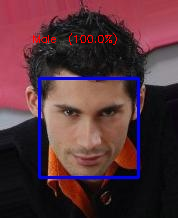

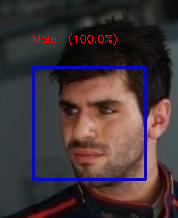

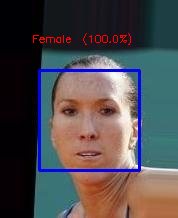

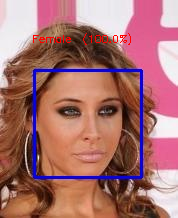

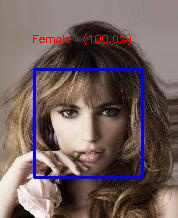

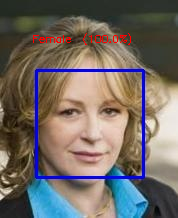

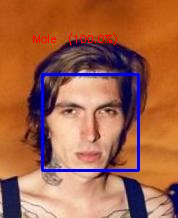

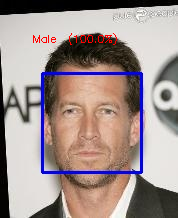

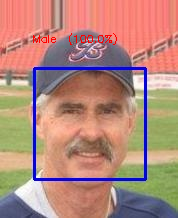

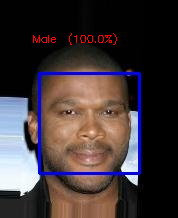

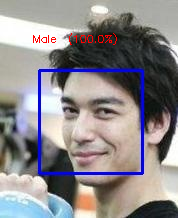

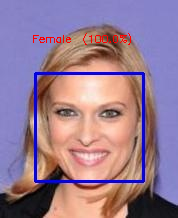

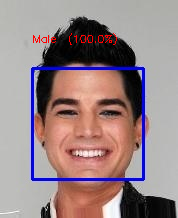

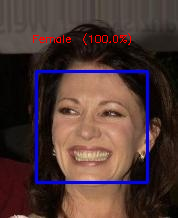

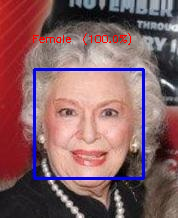

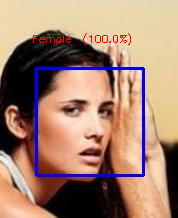

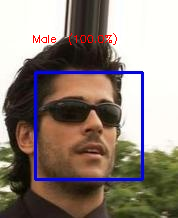

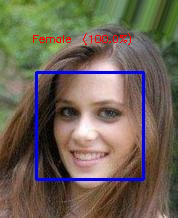

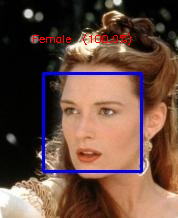

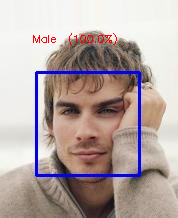

In [236]:
# Making Output images folder
os.makedirs("/content/Output images",exist_ok=True)


j=1             # Keeps track of how may images have been tested and ensures that the number does not exceed 20

for i in os.listdir("/content/gender_dataset/Dataset/Test_final_original"):
  img1=cv2.imread(os.path.join("/content/gender_dataset/Dataset/RandomChecking",i))   #Cropped, to be passed as input
  img2=cv2.imread(os.path.join("/content/gender_dataset/Dataset/Test_final_original",i))  #Original and has rectangles, to be displayed on screen

  if img1 is None:
    print("Error: Image not found or unable to load.")

  else:
    img1 = cv2.resize(img1, (64,64))
    testing=model.predict(img1.reshape(1,64,64,3),batch_size=5,verbose=0)[0]
    predicted_class = np.argmax(testing)
    confidence = np.max(testing) * 100
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_position = (32, 42)
    font_scale = 0.35
    text_color = (0, 0, 255)
    text_thickness = 1

    if testing[0]>testing[1]:
      text = "Female  (" + str(confidence) + "%)"
      cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)
      cv2_imshow(img2)

    else:
      text = "Male  (" + str(confidence) + "%)"
      cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)
      cv2_imshow(img2)
    cv2.imwrite("/content/Output images/"+i,img2)

    j+=1

  if j==21:
    break

#Preprocessing the group photo

In [276]:
coor={}           # Stores the coordinates of each head in a particular image in form of dictionary with name of the cropped image as key
file_name=""      # Stores the name of the image file (group photo)


for i in os.listdir("/content/Group Photos"):
  cropped_img_folder=(os.path.join("/content/Group Photos",i[0]))
  os.makedirs(cropped_img_folder,exist_ok=True)
  img1=cv2.imread(os.path.join("/content/Group Photos",i))
  file_name+=i[0]+'.jpg'

  if img1 is None:
    print("Error: Image not found or unable to load.")

  else:
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    j=0
    cropped_file=str(j)+".jpg"
    for (x, y, w, h) in faces:
      cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cropped=img1[y:y+h,x:x+w]
      coor[str(j)+".jpg"]=[x,y]
      i1=os.path.join(cropped_img_folder,str(j)+".jpg")
      cv2.imwrite(i1,cropped)
      j+=1
    cv2.imwrite(os.path.join("/content/Group Photos",i[0]+".jpg"),img1)

#Testing the model with the preprocessed group photo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


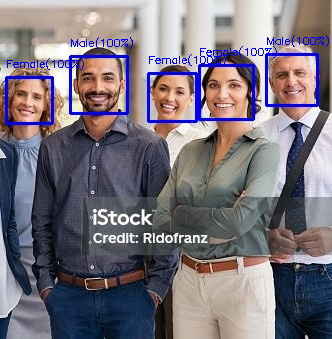

In [277]:
grp_test=[]  # Stores all the cropped sub_images of a single image
coor2=[]      # Stores the coordinates of each head in a particular image in form of list


for item in os.listdir("/content/Group Photos/"+str(i[0])):
  img1=cv2.imread(os.path.join("/content/Group Photos/"+i[0],item))
  img1=cv2.resize(img1,(64,64))
  grp_test.append(img1)
  coor2.append(coor[item])
grp_test=np.array(grp_test)
img2=cv2.imread("/content/Group Photos/"+file_name)


# Random testing the model with the group photo

for index,item in enumerate(grp_test):
  testing=model.predict(item.reshape(1,64,64,3),batch_size=1,verbose=1)

  for i in testing:
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_position = (coor2[index][0], coor2[index][1]-10)
    font_scale = 0.35
    text_color = (255, 0, 0)
    text_thickness = 1

    if i[0]>i[1]:
      confidence=int(i[0]*100)
      text = "Female(" + str(confidence) + "%)"
      cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)

    else:
      confidence=int(i[1]*100)
      text = "Male(" + str(confidence) + "%)"
      cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)

  cv2.imwrite(("/content/Output images/"+str(i[0])+".jpg"),img2)

cv2_imshow(img2)

# Commands for removing the created folders in content folder:

In [239]:
# shutil.rmtree("/content/gender_dataset")

In [275]:
# shutil.rmtree("/content/Group Photos")

In [241]:
# shutil.rmtree("/content/Output images")

In [ ]:
# shutil.rmtree("/content/gender_dataset.zip")

In [242]:
# import cv2
# from google.colab.patches import cv2_imshow
# import IPython
# from IPython.display import display,Javascript,Image
# from google.colab.output import eval_js
# import html
# import io
# import time
# import PIL
# from base64 import b64decode, b64encode
# import shutil

In [243]:
# # function to convert the JavaScript object into an OpenCV image
# def js_to_image(js_reply):
#   """
#   Params:
#           js_reply: JavaScript object containing image from webcam
#   Returns:
#           img: OpenCV BGR image
#   """
#   # decode base64 image
#   image_bytes = b64decode(js_reply.split(',')[1])
#   # convert bytes to numpy array
#   jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
#   # decode numpy array into OpenCV BGR image
#   img = cv2.imdecode(jpg_as_np, flags=1)

#   return img

In [244]:
# # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
# def bbox_to_bytes(bbox_array):
#   """
#   Params:
#           bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
#   Returns:
#         bytes: Base64 image byte string
#   """
#   # convert array into PIL image
#   bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
#   iobuf = io.BytesIO()
#   # format bbox into png for return
#   bbox_PIL.save(iobuf, format='png')
#   # format return string
#   bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

#   return bbox_bytes

In [245]:
# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#       async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)

#   # get photo data
#   data = eval_js('takePhoto({})'.format(quality))
#   # get OpenCV format image
#   img = js_to_image(data)

#   from google.colab.patches import cv2_imshow
#   face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#   coor={}
#   if img is None:
#      print("Error: Image not found or unable to load.")
#   else:
#     os.makedirs("/content/Captured_Image")
#     os.makedirs("/content/Cropped_Image")
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#     j=0
#     for (x, y, w, h) in faces:
#       cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#       cropped=img[y:y+h,x:x+w]
#       coor[str(j)+".jpg"]=[x,y]
#       i1=os.path.join("/content/Cropped_Image",str(j)+".jpg")
#       cv2.imwrite(i1,cropped)
#       j+=1
#     cv2.imwrite("/content/Captured_Image/"+"photo.jpg",img)

#     j=0
#     for i in os.listdir("/content/Cropped_Image"):
#       img1=cv2.imread("/content/Cropped_Image/"+i)
#       img2=cv2.imread("/content/Captured_Image/"+"photo.jpg")
#       resized=cv2.resize(img1,(64,64))
#       testing=model.predict(resized,batch_size=1,verbose=1)
#       font = cv2.FONT_HERSHEY_SIMPLEX
#       text_position = (coor[str(j)+".jpg"][0], coor[str(j)+".jpg"][1])
#       font_scale = 0.35
#       text_color = (255, 0, 0)
#       text_thickness = 1
#       if testing[0]>testing[1]:
#         confidence=int(i[0]*100)
#         text = "Female  (" + str(confidence) + "%)"
#         cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)
#       else:
#         confidence=int(i[1]*100)
#         text = "Male  (" + str(confidence) + "%)"
#         cv2.putText(img2, text, text_position, font, font_scale, text_color, text_thickness)

#     cv2.imwrite(("/content/Captured_Image/"+"photo.jpg"),img2)
#     cv2_imshow(img2)
#     return filename


In [246]:
# # try:
# filename = take_photo('photo.jpg')
# # except Exception as err:
# #   # Errors will be thrown if the user does not have a webcam or if they do not
# #   # grant the page permission to access it.
# #   print(str(err))